### DSC 540 Week 12 Data Wrangling with Python: 
### Project: Milestone 5
### Author: Brian Reppeto 2/21/2024

In [81]:
# import libraries

import pandas as pd
import csv
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# creat DB

file = "DSC540.db"
sqliteConnection = sqlite3.connect('DSC540.db')

In [69]:
# create API table from csv

# path to your CSV file
csv_file_path = 'api_data.csv'

# sqlite database file
sqlite_db_path = 'DSC540.db'

# connect to the database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()

# drop the existing table if it exists
cursor.execute('DROP TABLE IF EXISTS API')

# create a new table 

cursor.execute('''CREATE TABLE IF NOT EXISTS API (
                YEAR INT, 
                NAME TEXT,
                ALIAS TEXT, 
                VENUE_NAME TEXT, 
                SURFACE TEXT, 
                ROOF_TYPE TEXT, 
                STATE TEXT)''')

# open the file
with open(csv_file_path, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    
    # skip the header row
    next(csv_reader, None)
    
    # insert into the table
    for row in csv_reader:
        cursor.execute('INSERT INTO API VALUES (?,?,?,?,?,?,?)', row)

# commit changes and close the connection
conn.commit()
conn.close()

In [70]:
# select top 10 from new API table

# sqlite database file
sqlite_db_path = 'DSC540.db'

# connect to database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()

# execute the query to select top 10
cursor.execute('SELECT * FROM API LIMIT 10')

# fetch all rows from the query result
rows = cursor.fetchall()

# print each row
for row in rows:
    print(row)

# close the connection
conn.close()

(2018, 'Philadelphia Eagles', 'PHI', 'Lincoln Financial Field', 'Grass', 'Outdoor', 'PA')
(2018, 'Indianapolis Colts', 'IND', 'Lucas Oil Stadium', 'Artificial', 'Retractable_dome', 'IN')
(2018, 'New Orleans Saints', 'NO', 'Caesars Superdome', 'Artificial', 'Dome', 'LA')
(2018, 'Miami Dolphins', 'MIA', 'Hard Rock Stadium', 'Grass', 'Outdoor', 'FL')
(2018, 'Minnesota Vikings', 'MIN', 'U.S. Bank Stadium', 'Artificial', 'Dome', 'MN')
(2018, 'New York Giants', 'NYG', 'MetLife Stadium', 'Artificial', 'Outdoor', 'NY')
(2018, 'Baltimore Ravens', 'BAL', 'M&T Bank Stadium', 'Grass', 'Outdoor', 'MD')
(2018, 'New England Patriots', 'NE', 'Gillette Stadium', 'Artificial', 'Outdoor', 'MA')
(2018, 'Cleveland Browns', 'CLE', 'FirstEnergy Stadium', 'Grass', 'Outdoor', 'OH')
(2018, 'Los Angeles Chargers', 'LAC', 'Dignity Health Sports Park', 'Grass', 'Outdoor', 'CA')


In [71]:
# create SCRAPED table from csv


# path to your file
csv_file_path = 'scraped_data_cleaned.csv'

# sqlite database file
sqlite_db_path = 'DSC540.db'

# connect to database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()

# drop the existing table if it exists
cursor.execute('DROP TABLE IF EXISTS SCRAPED')

# create a new table
cursor.execute('''CREATE TABLE IF NOT EXISTS SCRAPED (
                PLAYER TEXT, 
                TM TEXT,
                FANTPOS TEXT, 
                AGE INT, 
                G INT, 
                GS INT, 
                FANTPT INT,
                POSRANK INT,
                OVRANK INT,
                YEAR INT)''')

# open the file
with open(csv_file_path, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    
    # skip the header row
    next(csv_reader, None)
    
    # insert rows into the table
    for row in csv_reader:
        cursor.execute('INSERT INTO SCRAPED VALUES (?,?,?,?,?,?,?,?,?,?)', row)

# commit changes and close the connection
conn.commit()
conn.close()

In [72]:
# select top 10 from new SCRAPED table

# sqlite database file
sqlite_db_path = 'DSC540.db'

# connect to the sqlite database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()

# execute the query to select top 10
cursor.execute('SELECT * FROM SCRAPED LIMIT 10')

# fetch all rows from the query result
rows = cursor.fetchall()

# print each row
for row in rows:
    print(row)

# close the connection
conn.close()

('Todd Gurley', 'LAR', 'RB', 24, 14, 14, 313, 1, 1, 2018)
('Saquon Barkley', 'NYG', 'RB', 21, 16, 16, 295, 2, 2, 2018)
('Christian McCaffrey', 'CAR', 'RB', 22, 16, 16, 279, 3, 3, 2018)
('Alvin Kamara', 'NO', 'RB', 23, 15, 13, 273, 4, 4, 2018)
('Patrick Mahomes', 'KC', 'QB', 23, 16, 16, 417, 1, 5, 2018)
('Tyreek Hill', 'KC', 'WR', 24, 16, 16, 247, 1, 6, 2018)
('Ezekiel Elliott', 'DAL', 'RB', 23, 15, 15, 252, 5, 7, 2018)
('Travis Kelce', 'KC', 'TE', 29, 16, 16, 192, 1, 8, 2018)
('Antonio Brown', 'PIT', 'WR', 30, 15, 15, 220, 2, 9, 2018)
('Davante Adams', 'GB', 'WR', 26, 15, 15, 219, 3, 10, 2018)


In [73]:
# create TEAMS table from csv

# path to your csv file
csv_file_path = 'teams_data_cleaned.csv'

# sqlite database file
sqlite_db_path = 'DSC540.db'

# connect to the sqlite database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()

# drop the existing table if it exists
cursor.execute('DROP TABLE IF EXISTS TEAMS')

# create a new table
cursor.execute('''CREATE TABLE IF NOT EXISTS TEAMS (
                SEASON INT, 
                TEAM TEXT,
                NFL TEXT, 
                NFL_TEAM_ID INT, 
                ESPN TEXT, 
                PFR TEXT, 
                PFF INT,
                PFFLABEL TEXT,
                FO TEXT,
                FULL TEXT,
                LOCATION TEXT,
                SHORT_LOCATION TEXT,
                NICKNAME TEXT,
                HYPHENATED TEXT,
                TEAM_SEASON TEXT)''')

# open the csv
with open(csv_file_path, newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    
    # skip the header row
    next(csv_reader, None)
    
    # insert rows into table
    for row in csv_reader:
        cursor.execute('INSERT INTO TEAMS VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)', row)

# commit changes and close the connection
conn.commit()
conn.close()


In [74]:
# select top 10


# database file
sqlite_db_path = 'DSC540.db'

# connect to the database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()

# execute the query to select top 10
cursor.execute('SELECT * FROM TEAMS LIMIT 10')

# fetch all rows from the query result
rows = cursor.fetchall()

# print each row
for row in rows:
    print(row)

# close the connection
conn.close()


(2018, 'ARI', 'ARI', 3800, 'ARI', 'CRD', 1, 'ARZ', 'ARI', 'Arizona Cardinals', 'Arizona', 'Arizona', 'Cardinals', 'Arizona-Cardinals', '2018_ARI')
(2018, 'ATL', 'ATL', 200, 'ATL', 'ATL', 2, 'ATL', 'ATL', 'Atlanta Falcons', 'Atlanta', 'Atlanta', 'Falcons', 'Atlanta-Falcons', '2018_ATL')
(2018, 'BAL', 'BAL', 325, 'BAL', 'RAV', 3, 'BLT', 'BAL', 'Baltimore Ravens', 'Baltimore', 'Baltimore', 'Ravens', 'Baltimore-Ravens', '2018_BAL')
(2018, 'BUF', 'BUF', 610, 'BUF', 'BUF', 4, 'BUF', 'BUF', 'Buffalo Bills', 'Buffalo', 'Buffalo', 'Bills', 'Buffalo-Bills', '2018_BUF')
(2018, 'CAR', 'CAR', 750, 'CAR', 'CAR', 5, 'CAR', 'CAR', 'Carolina Panthers', 'Carolina', 'Carolina', 'Panthers', 'Carolina-Panthers', '2018_CAR')
(2018, 'CHI', 'CHI', 810, 'CHI', 'CHI', 6, 'CHI', 'CHI', 'Chicago Bears', 'Chicago', 'Chicago', 'Bears', 'Chicago-Bears', '2018_CHI')
(2018, 'CIN', 'CIN', 920, 'CIN', 'CIN', 7, 'CIN', 'CIN', 'Cincinnati Bengals', 'Cincinnati', 'Cincinnati', 'Bengals', 'Cincinnati-Bengals', '2018_CIN')
(

In [75]:
# create NFL_DATA table

# database file
sqlite_db_path = 'DSC540.db'

# connect to the database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()

# check if the NFL_DATA table exists if not create it
cursor.execute('''
CREATE TABLE IF NOT EXISTS NFL_DATA AS
SELECT a.*, t.*
FROM API a
LEFT JOIN TEAMS t ON a.year = t.season AND a.alias = t.team
''')

# execute the query to select top 5
cursor.execute('SELECT * FROM NFL_DATA LIMIT 5')

# fetch all rows from the query
rows = cursor.fetchall()

# print each row
for row in rows:
    print(row)

# close the connection
conn.close()

(2018, 'Philadelphia Eagles', 'PHI', 'Lincoln Financial Field', 'Grass', 'Outdoor', 'PA', 2018, 'PHI', 'PHI', 3700, 'PHI', 'PHI', 24, 'PHI', 'PHI', 'Philadelphia Eagles', 'Philadelphia', 'Philadelphia', 'Eagles', 'Philadelphia-Eagles', '2018_PHI')
(2018, 'Indianapolis Colts', 'IND', 'Lucas Oil Stadium', 'Artificial', 'Retractable_dome', 'IN', 2018, 'IND', 'IND', 2200, 'IND', 'CLT', 14, 'IND', 'IND', 'Indianapolis Colts', 'Indianapolis', 'Indianapolis', 'Colts', 'Indianapolis-Colts', '2018_IND')
(2018, 'New Orleans Saints', 'NO', 'Caesars Superdome', 'Artificial', 'Dome', 'LA', 2018, 'NO', 'NO', 3300, 'NO', 'NOR', 20, 'NO', 'NO', 'New Orleans Saints', 'New Orleans', 'New Orleans', 'Saints', 'New-Orleans-Saints', '2018_NO')
(2018, 'Miami Dolphins', 'MIA', 'Hard Rock Stadium', 'Grass', 'Outdoor', 'FL', 2018, 'MIA', 'MIA', 2700, 'MIA', 'MIA', 17, 'MIA', 'MIA', 'Miami Dolphins', 'Miami', 'Miami', 'Dolphins', 'Miami-Dolphins', '2018_MIA')
(2018, 'Minnesota Vikings', 'MIN', 'U.S. Bank Stadium

In [76]:
# create FINAL_DATA table

# database file
sqlite_db_path = 'DSC540.db'

# connect to the database
conn = sqlite3.connect(sqlite_db_path)
cursor = conn.cursor()

# check if FINAL_DATA exists, if not, create it from SCRAPED
cursor.execute('CREATE TABLE IF NOT EXISTS FINAL_DATA AS SELECT * FROM SCRAPED AS S LEFT OUTER JOIN NFL_DATA AS n ON S.TM = n.ESPN AND S.YEAR = n.SEASON')

# execute the query to select top 5
cursor.execute('SELECT * FROM FINAL_DATA LIMIT 5')

# fetch all rows from the query
rows = cursor.fetchall()

# print each row
for row in rows:
    print(row)

# close the connection
conn.close()

('Todd Gurley', 'LAR', 'RB', 24, 14, 14, 313, 1, 1, 2018, 2018, 'Los Angeles Rams', 'LA', 'Los Angeles Memorial Coliseum', 'Grass', 'Outdoor', 'CA', 2018, 'LA', 'LA', 2510, 'LAR', 'RAM', 26, 'LA', 'LAR', 'Los Angeles Rams', 'Los Angeles Rams', 'LA Rams', 'Rams', 'Los-Angeles-Rams', '2018_LA')
('Saquon Barkley', 'NYG', 'RB', 21, 16, 16, 295, 2, 2, 2018, 2018, 'New York Giants', 'NYG', 'MetLife Stadium', 'Artificial', 'Outdoor', 'NY', 2018, 'NYG', 'NYG', 3410, 'NYG', 'NYG', 21, 'NYG', 'NYG', 'New York Giants', 'New York Giants', 'NY Giants', 'Giants', 'New-York-Giants', '2018_NYG')
('Christian McCaffrey', 'CAR', 'RB', 22, 16, 16, 279, 3, 3, 2018, 2018, 'Carolina Panthers', 'CAR', 'Bank of America Stadium', 'Artificial', 'Outdoor', 'NC', 2018, 'CAR', 'CAR', 750, 'CAR', 'CAR', 5, 'CAR', 'CAR', 'Carolina Panthers', 'Carolina', 'Carolina', 'Panthers', 'Carolina-Panthers', '2018_CAR')
('Alvin Kamara', 'NO', 'RB', 23, 15, 13, 273, 4, 4, 2018, 2018, 'New Orleans Saints', 'NO', 'Caesars Superdom

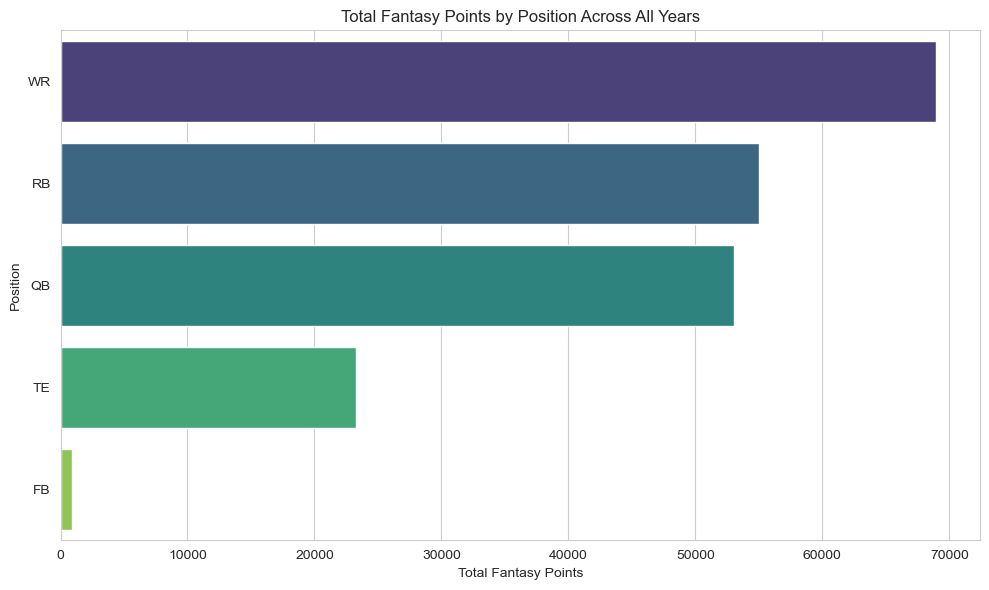

In [82]:
# plot 1 Total Fantasy Points by Position Across All Years

# set style
sns.set_style("whitegrid")

# total fantasy points by position across all years
query_1="""
SELECT FANTPOS, SUM(FANTPT) AS Total_Fantasy_Points
FROM FINAL_DATA
GROUP BY FANTPOS
ORDER BY Total_Fantasy_Points DESC;
"""

# execute the query
df_position = pd.read_sql_query(query_1, conn)

# create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Total_Fantasy_Points", y="FANTPOS", data=df_position, palette="viridis")
plt.title('Total Fantasy Points by Position Across All Years')
plt.xlabel('Total Fantasy Points')
plt.ylabel('Position')
plt.tight_layout()

# show the plot
plt.show()

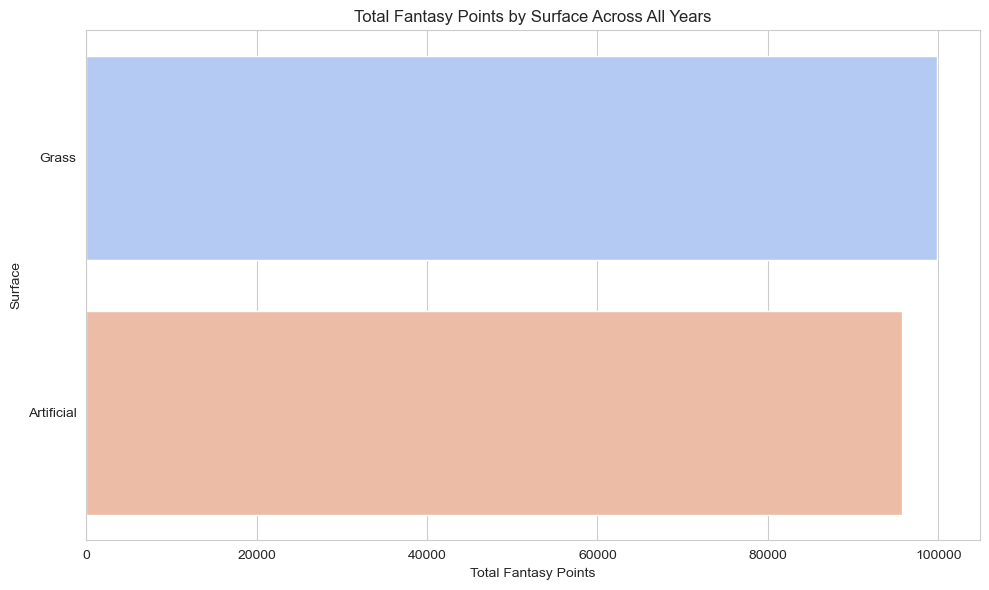

In [83]:
# plot 2 Total Fantasy Points by Surface Across All Years

# total fantasy points by surface across all years
query_2="""
SELECT SURFACE, SUM(FANTPT) AS Total_Fantasy_Points
FROM FINAL_DATA
WHERE SURFACE IS NOT NULL
GROUP BY SURFACE
ORDER BY Total_Fantasy_Points DESC;
"""

# execute query
df_surface = pd.read_sql_query(query_2, conn)

# create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Total_Fantasy_Points", y="SURFACE", data=df_surface, palette="coolwarm")
plt.title('Total Fantasy Points by Surface Across All Years')
plt.xlabel('Total Fantasy Points')
plt.ylabel('Surface')
plt.tight_layout()

# show plot
plt.show()

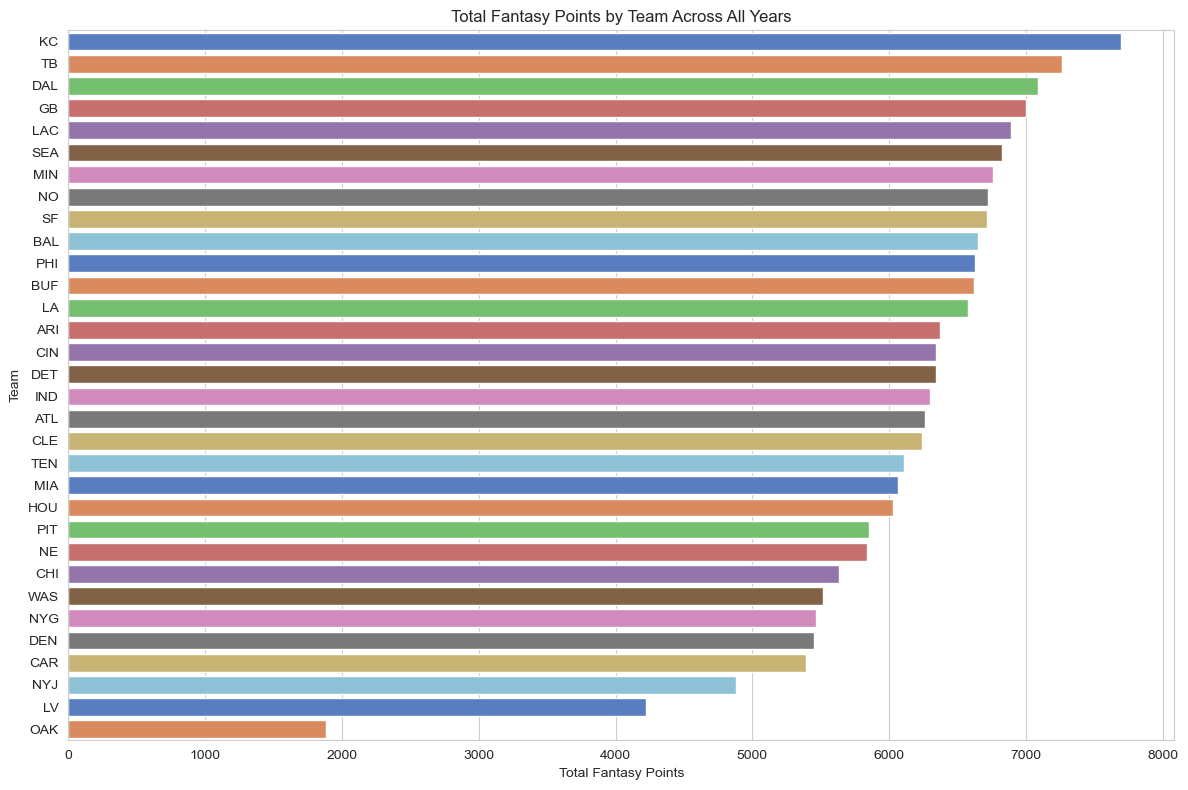

In [84]:
# plot 3 Total Fantasy Points by Team Across All Years

# total fantasy points by team across all years
query_3="""
SELECT TEAM, SUM(FANTPT) AS Total_Fantasy_Points
FROM FINAL_DATA
WHERE TEAM IS NOT NULL
GROUP BY TEAM
ORDER BY Total_Fantasy_Points DESC;
"""

# execute the query and
df_team = pd.read_sql_query(query_3, conn)

# create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x="Total_Fantasy_Points", y="TEAM", data=df_team, palette="muted")
plt.title('Total Fantasy Points by Team Across All Years')
plt.xlabel('Total Fantasy Points')
plt.ylabel('Team')
plt.tight_layout()

# show plot
plt.show()

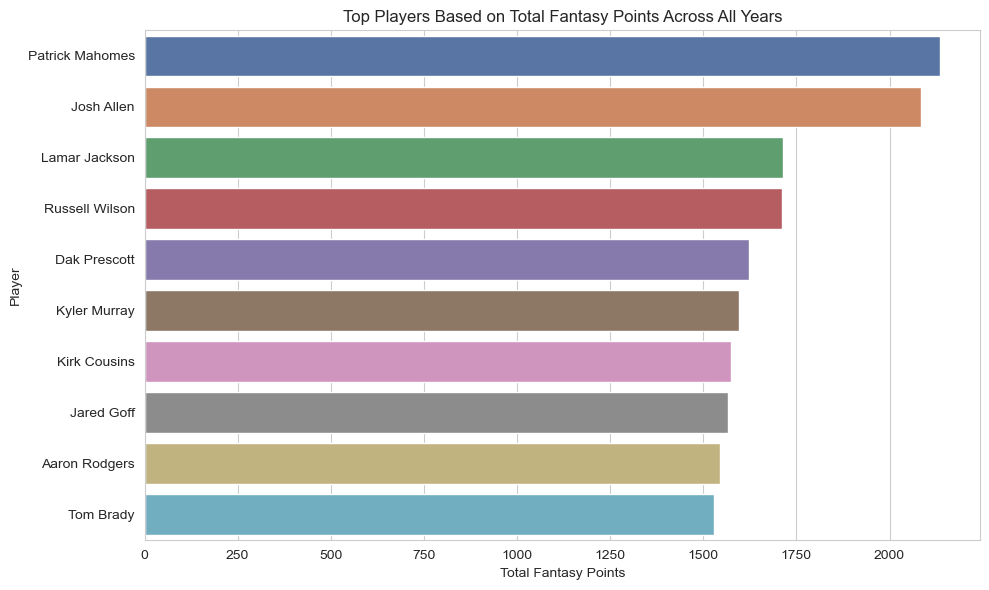

In [85]:
# plot 4 Top Players Based on Total Fantasy Points Across All Years

# total fantasy points across all years
query_4="""
SELECT PLAYER, SUM(FANTPT) AS Total_Fantasy_Points
FROM FINAL_DATA
GROUP BY PLAYER
ORDER BY Total_Fantasy_Points DESC
LIMIT 10;
"""

# execute the query
df_top_players = pd.read_sql_query(query_4, conn)

# create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Total_Fantasy_Points", y="PLAYER", data=df_top_players, palette="deep")
plt.title('Top Players Based on Total Fantasy Points Across All Years')
plt.xlabel('Total Fantasy Points')
plt.ylabel('Player')
plt.tight_layout()

# show plot
plt.show()

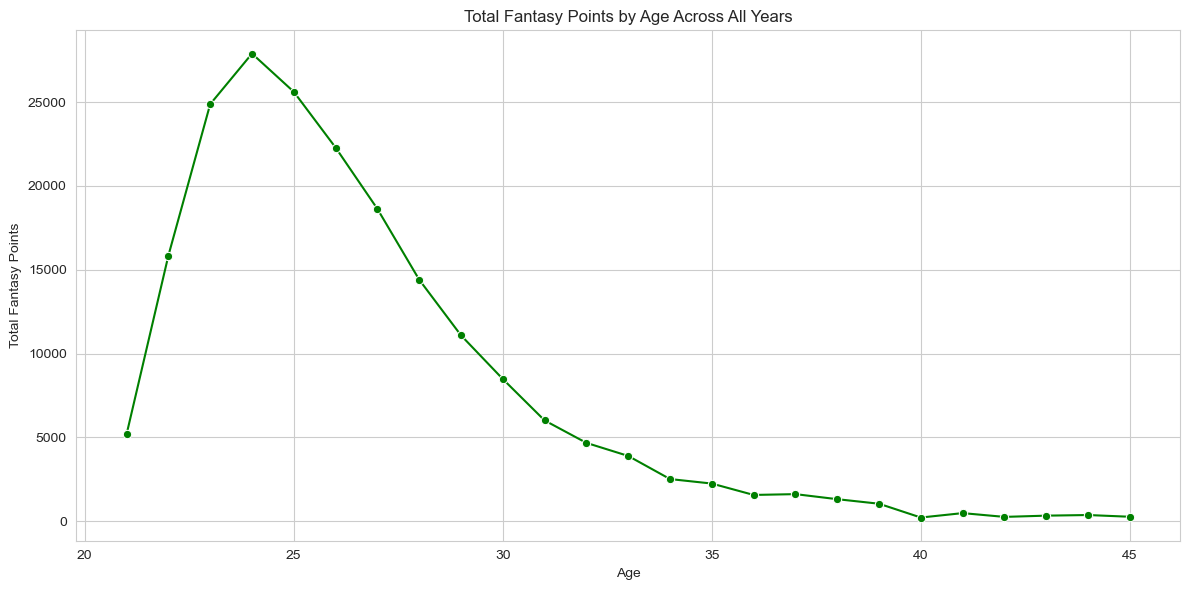

In [86]:
# plot 5 Total Fantasy Points by Age Across All Years

# total fantasy points by age across all years
query_5="""
SELECT AGE, SUM(FANTPT) AS Total_Fantasy_Points
FROM FINAL_DATA
GROUP BY AGE
ORDER BY AGE;
"""

# execute the query
df_age = pd.read_sql_query(query_5, conn)

# create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="AGE", y="Total_Fantasy_Points", data=df_age, marker='o', color='green')
plt.title('Total Fantasy Points by Age Across All Years')
plt.xlabel('Age')
plt.ylabel('Total Fantasy Points')
plt.grid(True)
plt.tight_layout()

# show plot
plt.show()

The project encompassed a multi-faceted analysis of NFL data. Several fantasy football aspects were examined to include team venues, game characteristics, player performances, and the implications of these performances on fantasy football.  The analysis was conducted on data from 2018 to 2023. Through a series of five milestones, the analysis covered a wide range of data manipulation and exploration techniques, from initial data collection and cleansing to detailed statistical analysis and ethical consideration of data use.

Data Collection and Cleansing
The initial milestones focused on gathering comprehensive NFL data from various sources (API, Scraped, and CSV), and required the datasets to be clean and restructured. This process involved scraping data from a sport website, working with API's and downloading CSV's. Then dealing with the inconsistencies across the different datasets, and standardizing the data formats to facilitate analysis. The key steps included the removal of unnecessary columns, normalization of player statistics, and the consolidation of data from multiple years into a single, analyzable dataset. This meticulous data preparation was crucial for ensuring the reliability and validity of subsequent analyses.

Feature Engineering and Analysis
Subsequent stages of the project involved feature engineering, where new variables were created to better capture the nuances of NFL games and player performances. This included analyzing team venues, game environments (e.g., indoor vs. outdoor, turf type), and their potential impacts on player statistics and game outcomes. Advanced statistical techniques and data visualization tools were employed to uncover trends and patterns, offering insights into factors that might influence fantasy football performance and team success rates.

Ethical Considerations
A significant portion of the project was devoted to addressing the ethical implications of working with NFL data, particularly in relation to privacy, accuracy, and the potential for misuse. The project emphasized the importance of using publicly available data without revealing sensitive personal information about the players or teams involved. Efforts were made to ensure the data's accuracy by relying on reputable sources and transparent methodologies.

The ethical discussion also highlighted the broader implications of sports analytics, including the potential for gambling addiction and the financial impact on fantasy football participants. Concerns were raised about the commodification of athletes through data and the ethical responsibilities of data analysts to prevent harm. The project underscored the necessity of conducting sports analytics in a manner that respects the dignity and privacy of athletes, avoids promoting unhealthy gambling behaviors, and contributes positively to the sports community.

Conclusion
In summary, this comprehensive analysis of NFL data not only showcased advanced data manipulation and analysis techniques but also brought to light the ethical complexities associated with sports analytics. By navigating these challenges thoughtfully, the project contributes to a more nuanced understanding of the impact of environmental factors on sports performances and the ethical considerations that must guide the analysis of sports data. Through its thorough examination of NFL player performances and game characteristics, the project demonstrates the potential of data analytics to enhance our understanding of sports while advocating for ethical standards that protect individuals' privacy and well-being.